In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
df = pd.read_csv("WineQT.csv")

In [4]:
print("Loaded data shape:", df.shape)
print("Columns:", df.columns.tolist())

Loaded data shape: (1143, 13)
Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [5]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [8]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000        

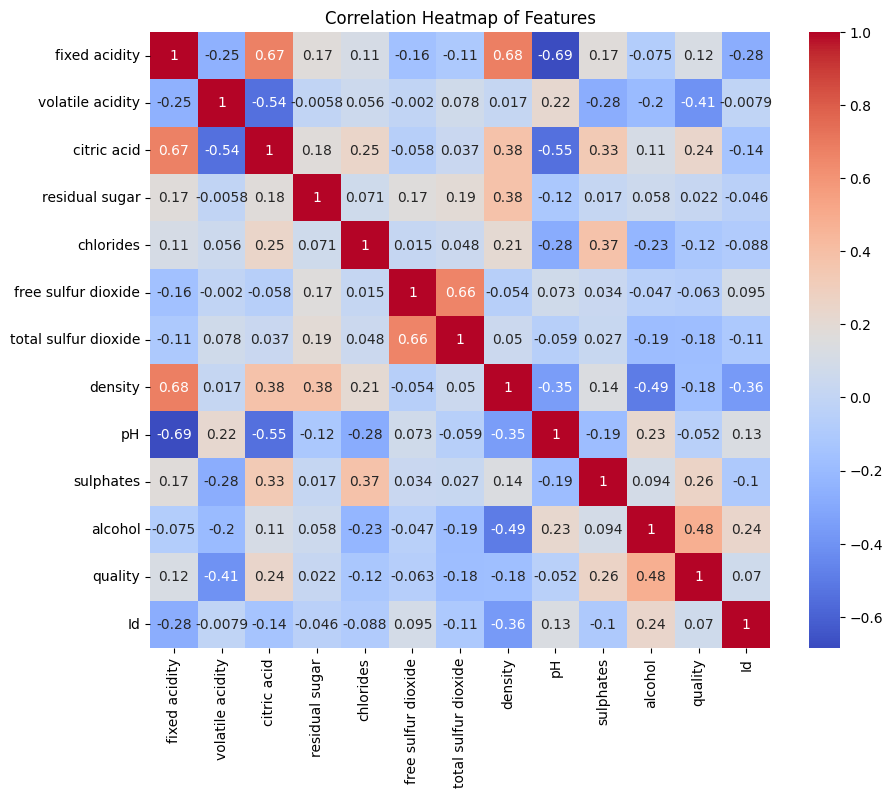

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

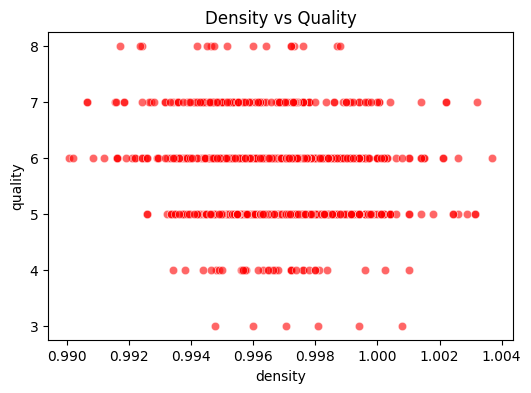

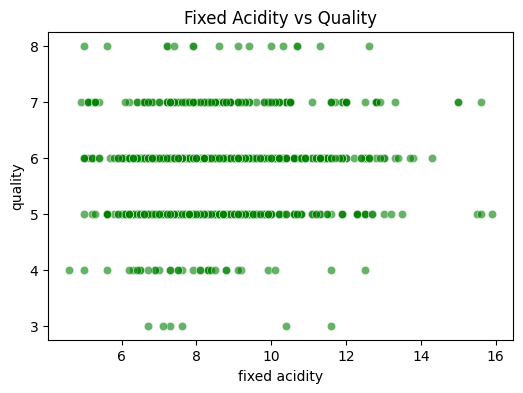

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="density", y="quality", alpha=0.6, color="red")
plt.title("Density vs Quality")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="fixed acidity", y="quality", alpha=0.6, color="green")
plt.title("Fixed Acidity vs Quality")
plt.show()

In [42]:
X = df.drop("quality", axis=1)
y = df["quality"]

print(X.columns)
print(len(X.columns))


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Id'],
      dtype='object')
12


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData Split Done ✅")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Data Split Done ✅
Training Samples: 914
Testing Samples: 229


In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nFeature Scaling Done ✅")


Feature Scaling Done ✅


In [34]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "SGD": SGDClassifier(random_state=42)
}


In [35]:
cv_scores = {}
print("\n🔍 Base Model Performance (5-Fold Cross Validation):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(f"{name}: {round(scores.mean()*100, 2)}%")


🔍 Base Model Performance (5-Fold Cross Validation):

Random Forest: 62.47%
SVM: 61.05%
SGD: 49.24%


In [37]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

In [38]:
grid_rf.fit(X_train, y_train)
print("\n🔥 Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Cross-Validation Accuracy:", round(grid_rf.best_score_ * 100, 2), "%")



🔥 Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 64.88 %


In [39]:
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

In [40]:
print("\n🎯 Test Set Evaluation (Best Random Forest):")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



🎯 Test Set Evaluation (Best Random Forest):
Accuracy: 71.62 %

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.84      0.78        97
           6       0.68      0.75      0.72        92
           7       0.78      0.48      0.60        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.37      0.34      0.35       229
weighted avg       0.68      0.72      0.69       229


Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 81 15  1  0]
 [ 0  0 21 69  2  0]
 [ 0  0  3 12 14  0]
 [ 0  0  0  2  1  0]]


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

In [41]:
with open("best_wine_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)
print("\n💾 Model Saved Successfully as 'best_wine_model.pkl' 🎉")


💾 Model Saved Successfully as 'best_wine_model.pkl' 🎉
